In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path = os.path.join('..', 'dataset')

train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))
ground_truth = pd.read_csv(os.path.join(data_path, 'gender_submission.csv'))
test_df = test_df.merge(ground_truth, on='PassengerId')

print(train_df)
print(train_df.shape)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [2]:
"""
Training set
Missing value analysis:
'Age' has 177 missing values (about 20% of the data).
'Embarked' has 2 missing values only.
"""
train_df.info()
print(train_df.columns)
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
"""
testing set
Missing value analysis:
'Age' has 86 missing values (about 20% of the data).
'Fate' has 1 missing values only.
"""
test_df.info()
print(test_df.columns)
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


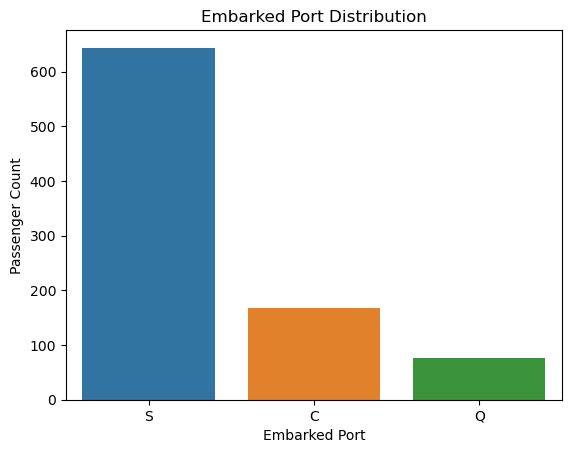

In [4]:
"""
Drop columns that are either irrelevant or too messy for initial analysis
'Name': Requires additional processing (e.g., extracting titles like Mr, Mrs)
'Ticket': Too many unique values with inconsistent formatting
'Cabin': High proportion of missing values (~77%), not useful without heavy imputation
'PassengerId': Just an index column with no predictive value
"""
train_df = train_df.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'])
test_df = test_df.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'])

"""
'Embarked' will be filled with its mode (most frequent value), which is reasonable since only two values are missing,
and replacing them with the most common port ('S') minimizes potential bias.
"""

# Count plot for 'Embarked' to visualize the mode
sns.countplot(x='Embarked', data=train_df)
plt.title('Embarked Port Distribution')
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.show()

# Fill missing values in 'Embarked' with its mode
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)

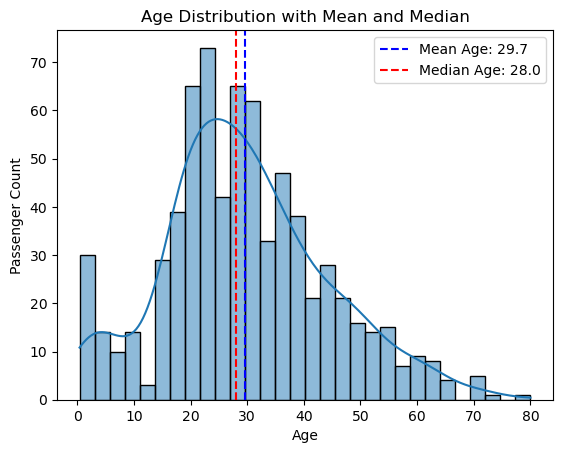

In [5]:
"""
'Age' will be filled with the mean value. Although median could also work, using the mean allows us to preserve the distribution's central tendency,
and the proportion of missing data is moderate, making mean imputation acceptable in this case.
"""

age_mean = train_df['Age'].mean()
age_median = train_df['Age'].median()

sns.histplot(train_df['Age'], kde=True, bins=30)
plt.axvline(age_mean, color='blue', linestyle='--', label=f'Mean Age: {age_mean:.1f}')
plt.axvline(age_median, color='red', linestyle='--', label=f'Median Age: {age_median:.1f}')
plt.title('Age Distribution with Mean and Median')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

train_df['Age'] = train_df['Age'].fillna(age_mean)
test_df['Age'] = test_df['Age'].fillna(age_mean)    #Avoids data leakage by not referencing the test set directly.

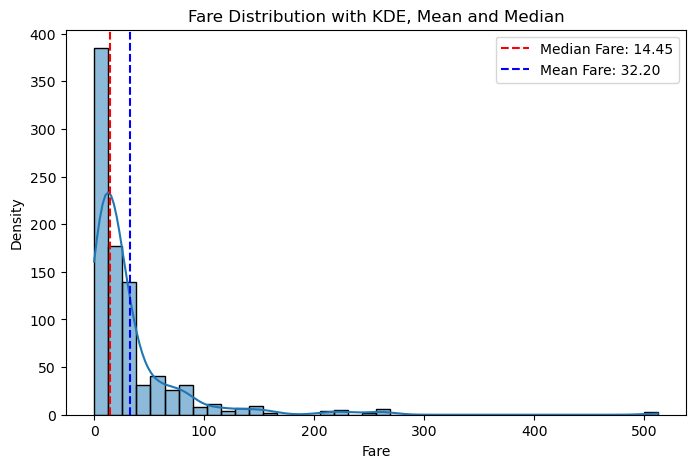

In [6]:
"""
Fill missing value in 'Fare' in the test set using the median from the training set.
Fare is a continuous variable with a highly skewed distribution due to a few expensive tickets.
Using the median instead of the mean helps reduce the influence of outliers,
and we avoid data leakage by not computing statistics from the test set.
"""

fare_mean = train_df['Fare'].mean()
fare_median = train_df['Fare'].median()

plt.figure(figsize=(8, 5))
sns.histplot(train_df['Fare'], bins=40, kde=True)

plt.axvline(fare_median, color='red', linestyle='--', label=f'Median Fare: {fare_median:.2f}')
plt.axvline(fare_mean, color='blue', linestyle='--', label=f'Mean Fare: {fare_mean:.2f}')

plt.title('Fare Distribution with KDE, Mean and Median')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()


test_df['Fare'] = test_df['Fare'].fillna(fare_median)


In [7]:
# Check remaining missing values
print("Missing values in train set:\n", train_df.isnull().sum())
print("Missing values in test set:\n", test_df.isnull().sum())

Missing values in train set:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Missing values in test set:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [8]:
train_df['SurvivedLabel'] = train_df['Survived'].map({0: 'Died', 1: 'Survived'})
train_df['PclassLabel'] = train_df['Pclass'].map({
    1: '1st (First Class)',
    2: '2nd (Business Class)',
    3: '3rd (Economy Class)'
})
train_df['EmbarkedLabel'] = train_df['Embarked'].map({
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
})

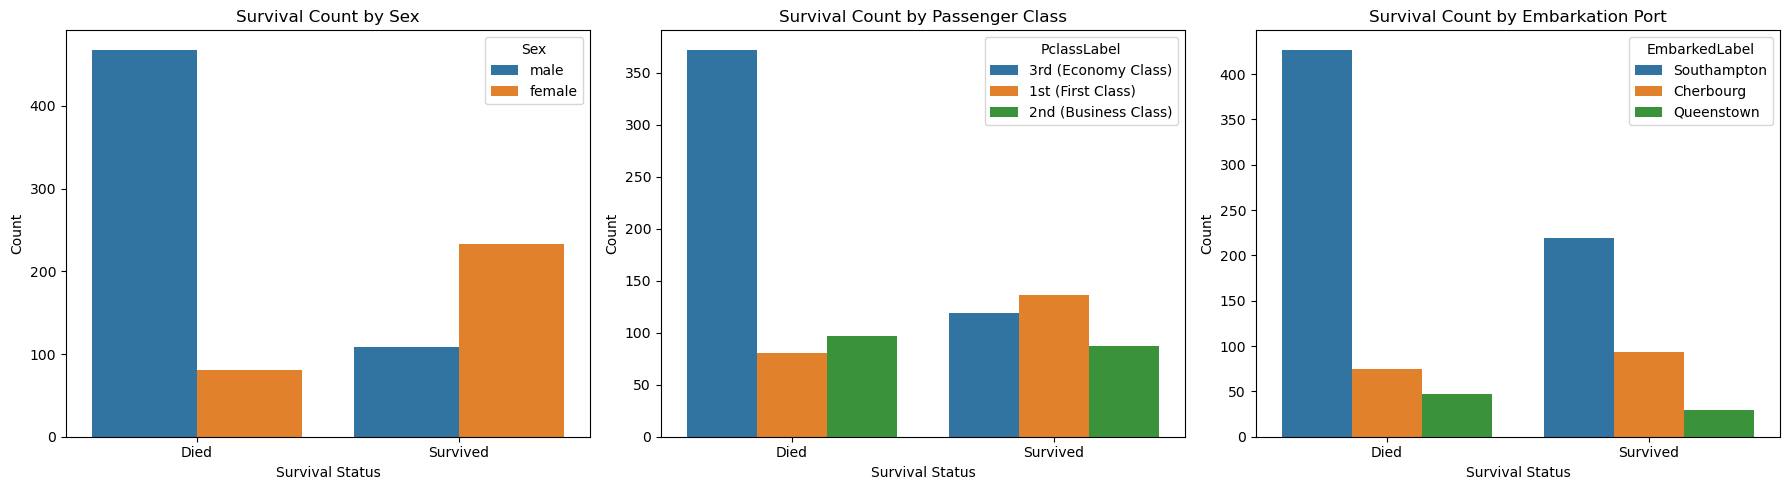

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sex vs Survived
sns.countplot(ax=axes[0], x='SurvivedLabel', hue='Sex', data=train_df)
axes[0].set_title('Survival Count by Sex')
axes[0].set_xlabel('Survival Status')
axes[0].set_ylabel('Count')

# Pclass vs Survived
sns.countplot(ax=axes[1], x='SurvivedLabel', hue='PclassLabel', data=train_df)
axes[1].set_title('Survival Count by Passenger Class')
axes[1].set_xlabel('Survival Status')
axes[1].set_ylabel('Count')

# Embarked vs Survived
sns.countplot(ax=axes[2], x='SurvivedLabel', hue='EmbarkedLabel', data=train_df)
axes[2].set_title('Survival Count by Embarkation Port')
axes[2].set_xlabel('Survival Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

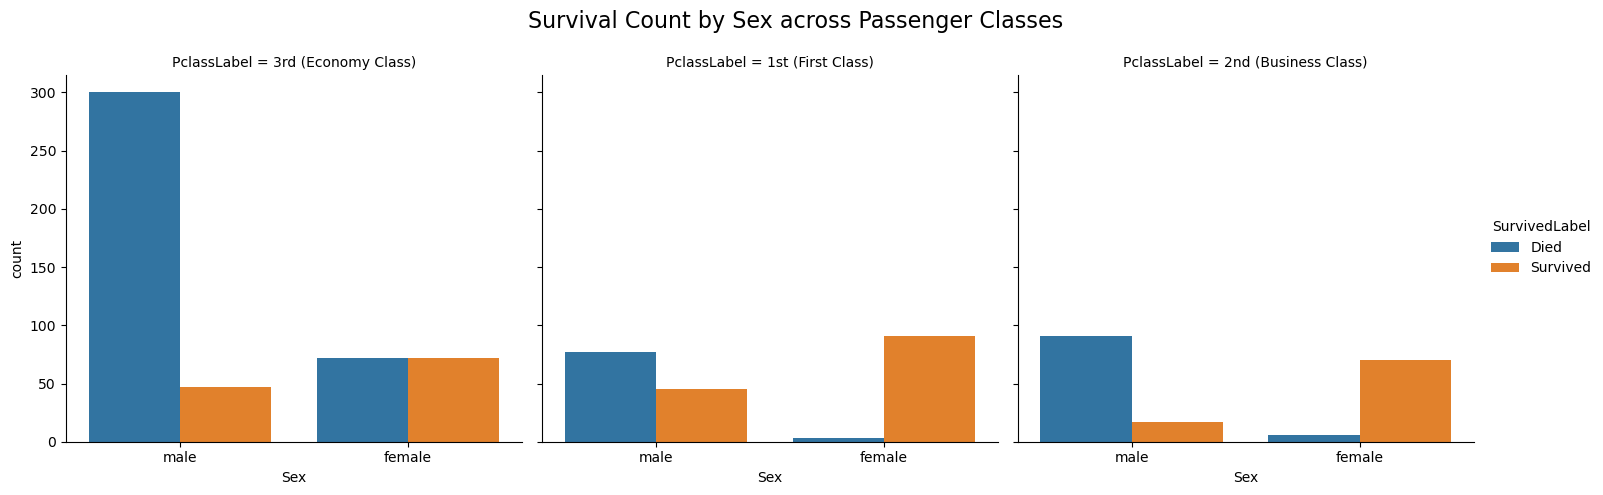

In [10]:
sns.catplot(
    x='Sex',
    hue='SurvivedLabel',
    col='PclassLabel',
    kind='count',
    data=train_df
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Count by Sex across Passenger Classes', fontsize=16)
plt.show()

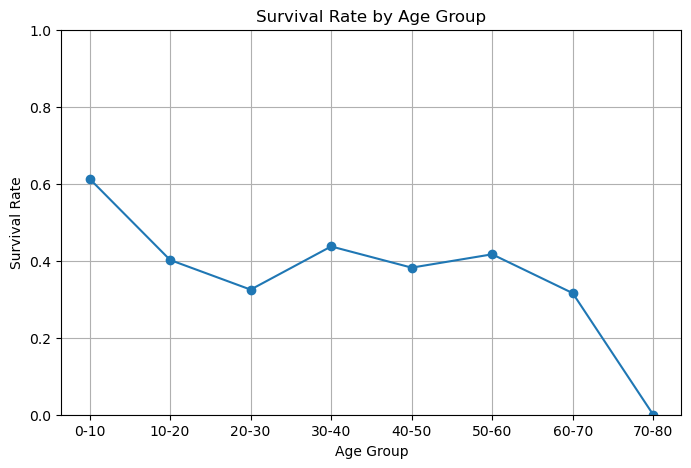

In [11]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

age_survival = train_df.groupby('AgeGroup')['Survived'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(age_survival['AgeGroup'], age_survival['Survived'], marker='o', linestyle='-')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

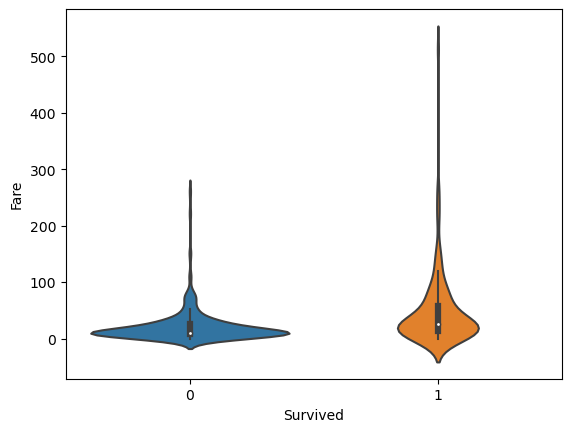

In [12]:
sns.violinplot(x='Survived', y='Fare', data=train_df)

<AxesSubplot:xlabel='IsAloneLabel', ylabel='Survived'>

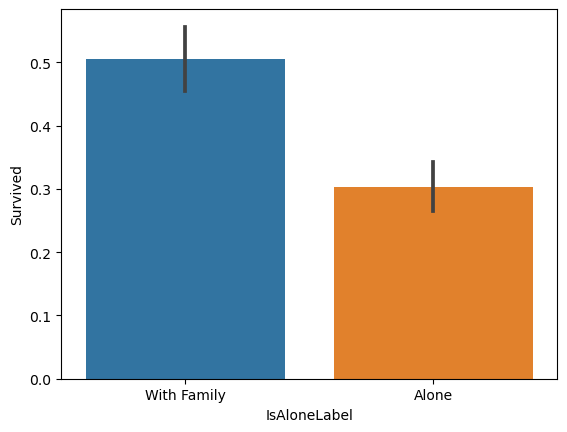

In [13]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
train_df['IsAloneLabel'] = train_df['IsAlone'].map({0: 'With Family', 1: 'Alone'})
sns.barplot(x='IsAloneLabel', y='Survived', data=train_df)

In [14]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.500000,0,0,7.8292,Q,0
1,3,female,47.000000,1,0,7.0000,S,1
2,2,male,62.000000,0,0,9.6875,Q,0
3,3,male,27.000000,0,0,8.6625,S,0
4,3,female,22.000000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,S,0
414,1,female,39.000000,0,0,108.9000,C,1
415,3,male,38.500000,0,0,7.2500,S,0
416,3,male,29.699118,0,0,8.0500,S,0


Accuracy: 0.8373205741626795
Confusion Matrix:
 [[235  31]
 [ 37 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       266
           1       0.79      0.76      0.77       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.84      0.84      0.84       418



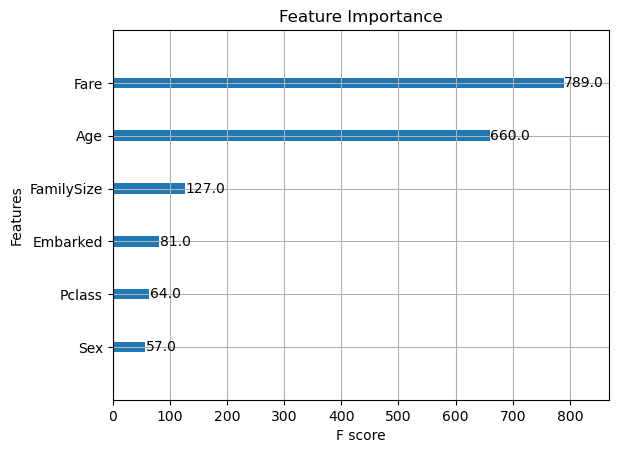

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Choose features
features = ['Pclass', 'Sex','Fare', 'Age', 'Embarked', 'FamilySize', 'IsAlone']
X_train = train_df[features].copy()
y_train = train_df['Survived']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)
X_test = test_df[features].copy()

# Label Encoding
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
X_train['Sex'] = le_sex.fit_transform(X_train['Sex'])
X_test['Sex'] = le_sex.transform(X_test['Sex'])

X_train['Embarked'] = le_embarked.fit_transform(X_train['Embarked'])
X_test['Embarked'] = le_embarked.transform(X_test['Embarked'])

# Train model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Predict testing dataset
y_pred = model.predict(X_test)
y_true = test_df['Survived']
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

# Feature Importance
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()


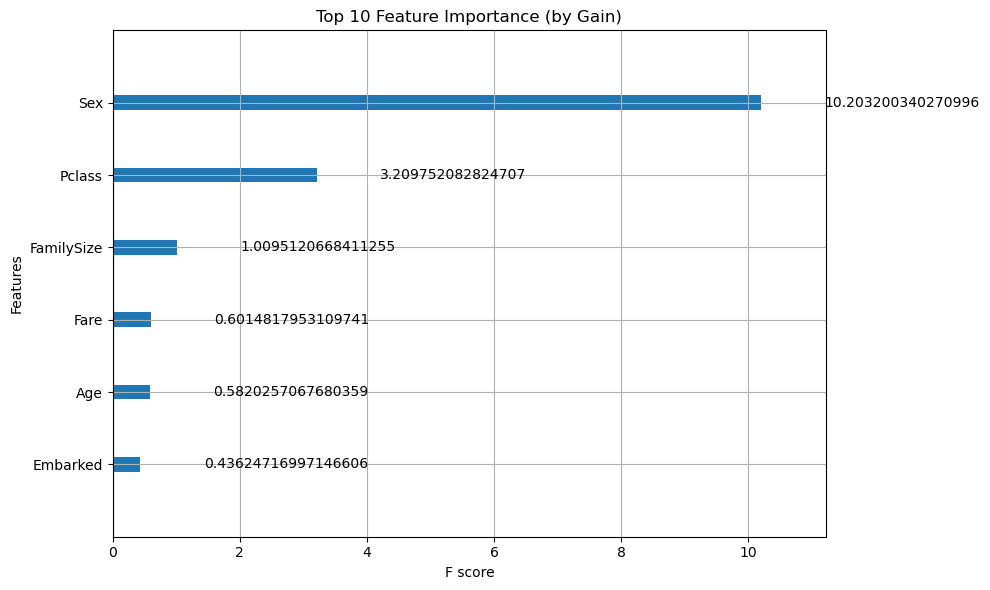

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, importance_type='gain', max_num_features=10, ax=ax)
plt.title("Top 10 Feature Importance (by Gain)")
plt.tight_layout()
plt.show()